In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy import stats

In [2]:
df = pd.read_csv(
    r'F:\Code\coupling\python\file\data\SDI_sub\sc_mode_sdi_re.csv')

df1 = df[['group', 'fa']].copy()
df1.insert(loc=1, column='mode', value='FA')
df1.rename(columns={"fa": "SDI"}, inplace=True)

df2 = df[['group', 'md']].copy()
df2.insert(loc=1, column='mode', value='MD')
df2.rename(columns={"md": "SDI"}, inplace=True)

df3 = df[['group', 'num']].copy()
df3.insert(loc=1, column='mode', value='NUM')
df3.rename(columns={"num": "SDI"}, inplace=True)

df_re = pd.concat([df1, df2, df3], ignore_index=True)
#df_re = df_re.append(df3)

df_re.loc[df_re['group'] == 1, 'group'] = 'NC'
df_re.loc[df_re['group'] == 2, 'group'] = 'MCI'
df_re.loc[df_re['group'] == 3, 'group'] = 'AD'


In [3]:
def GetPvalue_Pearson(x,y,df):
    return pearsonr(x,y)[1]
    df.corr()
    df.corr(method=GetPvalue_Pearson)

Text(0, 0.5, 'SDI')

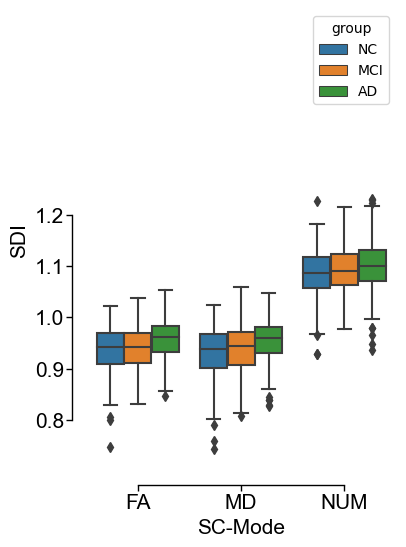

In [4]:

fig, ax = plt.subplots(figsize=(4, 6))
# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='mode', y="SDI",
            hue = 'group',
            #data=df_re[df_re['group'] != 'MCI'],
            data=df_re,
            )
sns.despine(offset=10, trim=True)

font1 = {'fontproperties':'Arial','weight':'normal','size':15,'color':'black'}
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
plt.tick_params(labelsize=15, pad=2, length=4, width=1,)
plt.ylim([0.7, 1.6])

x1_label = ax.get_xticklabels() 
[x1_label_temp.set_fontname('Arial') for x1_label_temp in x1_label]
y1_label = ax.get_yticklabels() 
[y1_label_temp.set_fontname('Arial') for y1_label_temp in y1_label]

plt.xlabel('SC-Mode',font1)
plt.ylabel('SDI',font1)

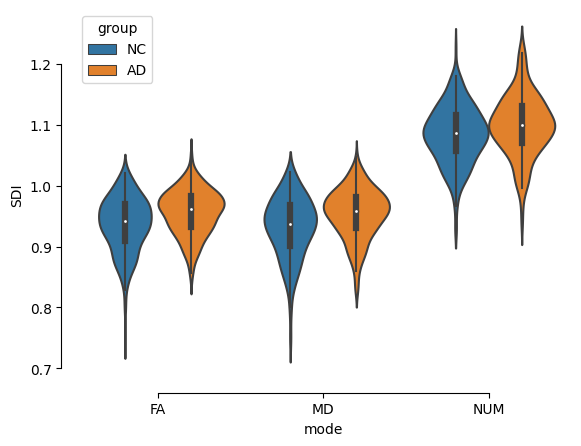

In [13]:
#sns.set_theme(style="ticks", palette="pastel")



df_AD_NC = df_re[df_re['group']!= 'MCI']

# Draw a nested boxplot to show bills by day and time
sns.violinplot(x='mode', y="SDI",
            hue = 'group',
            data=df_AD_NC)
sns.despine(offset=10, trim=True)




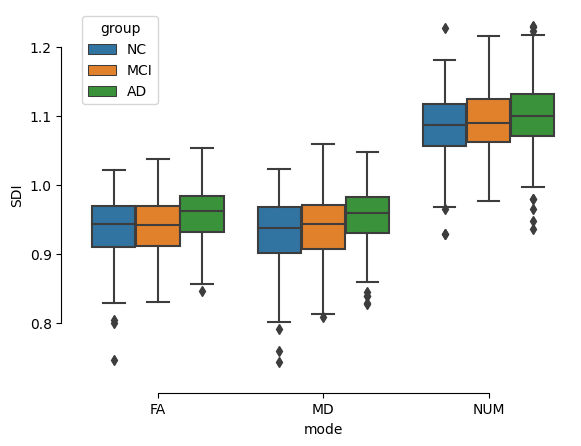

In [4]:
#sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='mode', y="SDI",
            hue = 'group',
            data=df_re)
sns.despine(offset=10, trim=True)

In [ ]:
def t_to_effect_size(t_value, sample_size):
    effect_size = t_value / np.sqrt(sample_size)
    return effect_size 



In [42]:
groupList = ['NC','MCI','AD']
modeList = ['FA','MD','NUM']

TList = np.array([[1,3],[1,2],[2,3]]) -1
T_re = np.zeros([3,3])
P_re = np.zeros([3,3])
cohensd = np.zeros([3,3])
for i in range(3):
    for j in range(3):
        c= TList[i][1]
        a = df_re[(df_re['group']== groupList[TList[i][0]]) &( df_re['mode']== modeList[j])]['SDI'].values
        b = df_re[(df_re['group']== groupList[TList[i][1]]) &( df_re['mode']== modeList[j])]['SDI'].values
        t1 = stats.ttest_ind(a,b)

        d = modeList[j]
        e = t1.statistic
        T_re[i,j] = t1.statistic
        P_re[i,j] = t1.pvalue
        cohensd[i,j] = t1.statistic/ np.sqrt(len(a)+len(b))


In [41]:

re = np.zeros([9,3])
re[:,0] = T_re.T.reshape([9])
re[:,1] = P_re.T.reshape([9])
re[:,2] = cohensd.T.reshape([9])

np.savetxt(r'F:\Code\coupling\matlab\file\group\dif_group.csv',re,delimiter=',')


In [19]:

t1 = stats.ttest_ind(a,b)
c = t1.pvalue